# Phones Dataset Basic Models
The following code compares the performance of Logistic Regression, Random Forest and Long Short-Term Memory
The models are trained with two variables: 
- cleaned_reviews (review text without numbers, special characters, stopwords and punctuation, tokenized and lemmatized) 
- IsHelpful (min 70% helpfullness)

In [1]:
import warnings
warnings.filterwarnings('ignore')

#General Data/Plotting
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tqdm.auto import tqdm 
import random

# Language
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re 
from collections import Counter
from string import punctuation

# Modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential 
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Dense , Embedding , Bidirectional , LSTM

lemma = WordNetLemmatizer()

In [2]:
df = pd.read_json('../Datasets/Modified_Phones_rating.json', lines=True)
df.head()

,helpful,Review,Rating,Title,helpful_0,helpful_1,ratio_percent,review_len,IsHelpful,cleaned_reviews
0,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,4,4,100,51,1,item arrived great time perfect condition howe...
1,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,2,3,66,23,0,awesome stay look great used multiple apple pr...
2,"[2, 3]","Good case, solid build. Protects phone all aro...",5,Solid Case,2,3,66,44,0,good case solid build protects phone around go...
3,"[2, 3]",This is the first battery case I have had for ...,5,A Winner,2,3,66,71,0,this first battery case i galaxy s the s fit w...
4,"[3, 3]",Performs exactly as advertised . It's very st...,5,Absolutely love the case !!,3,3,100,47,1,performs exactly advertised it sturdily builta...


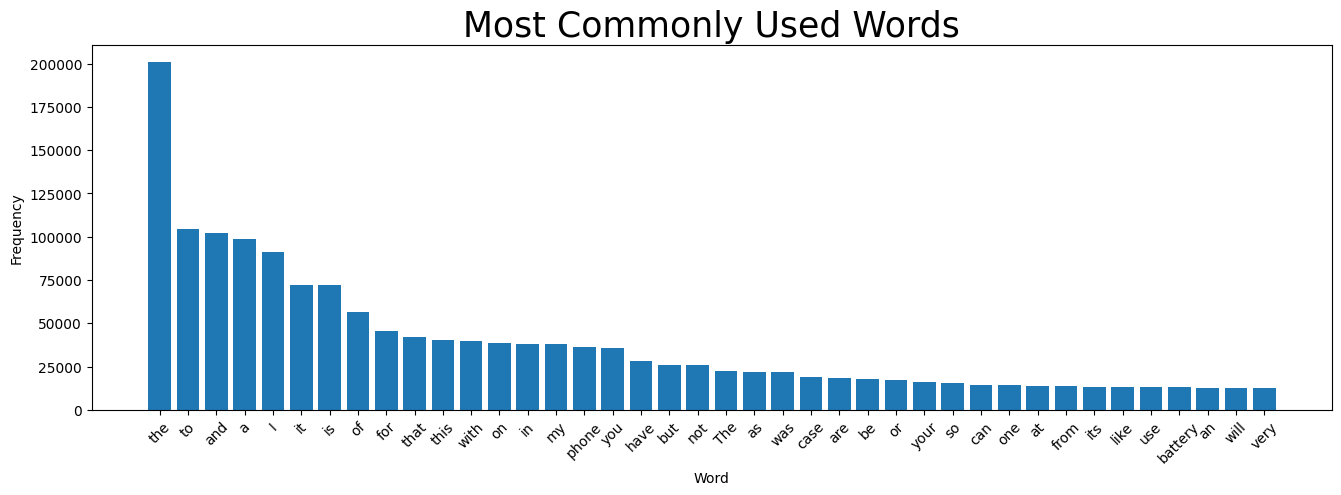

In [3]:
# evaluate most used words
def MostWordsUsed(txt , n_words) : 
    all_text = ''.join(df[txt].values) 
    
    all_text = re.sub(r'\d+', '', all_text) # numbers
    all_text = re.sub(r'[^\w\s]', '', all_text) # special characters
    
    words = all_text.split() 
    
    word_counts = Counter(words)
    
    top_words = word_counts.most_common(n_words)
    
    return top_words

top_words = MostWordsUsed('Review' , 40)

xaxis = [word[0] for word in top_words]
yaxis = [word[1] for word in top_words]

plt.figure(figsize=(16,5))
plt.bar(xaxis , yaxis)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words', fontsize=25)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.15)
plt.show()

In [4]:
# split data into training set and validation set
# 'cleand_reviews' as feature variable and 'IsHelpful' as target that is to be predicted for training
# 80% of the data will be used for training
x_train , x_val , y_train , y_val = train_test_split(df['cleaned_reviews'] , df['IsHelpful'] , train_size = 0.80 , random_state = 42)
len(x_train) , len(x_val)

(14566, 3642)

In [5]:
# feature extraction
# "feature words" = eindeutigen Wörter oder Terme im Vokabular, die als Features für die Darstellung der Dokumente verwendet werden. Jedes Dokument wird als Vektor von TF-IDF-Werten für diese feature words dargestellt.
vec = TfidfVectorizer()
vec.fit(x_train)
print("No. of feature words: ",len(vec.get_feature_names_out()))

No. of feature words:  66985


In [6]:
x_train = vec.transform(x_train).toarray()
x_val = vec.transform(x_val).toarray()

# Logistic Regression

In [7]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train , y_train)

LogisticRegression(random_state=42)

In [8]:
train_acc1 = lr.score(x_train , y_train)

lr_pred = lr.predict(x_val)

val_acc1 = accuracy_score(y_val , lr_pred) 

val_precision1 = precision_score(y_val , lr_pred , average='weighted')
val_recall1 = recall_score(y_val , lr_pred , average='weighted')
val_f1score1 = f1_score(y_val , lr_pred , average='weighted')

print(f"The training accuracy for logistic regression : {(train_acc1*100):0.2f}%\n")
print(f"The validation accuracy for logistic regression : {(val_acc1*100):0.2f}%\n")
print(f"The precision for logistic regression : {val_precision1:0.2f}\n")
print(f"The recall for logistic regression : {val_recall1:0.2f}\n")
print(f"The f1 score for logistic regression : {val_f1score1:0.2f}\n")

The training accuracy for logistic regression : 76.86%

The validation accuracy for logistic regression : 67.74%

The precision for logistic regression : 0.66

The recall for logistic regression : 0.68

The f1 score for logistic regression : 0.64



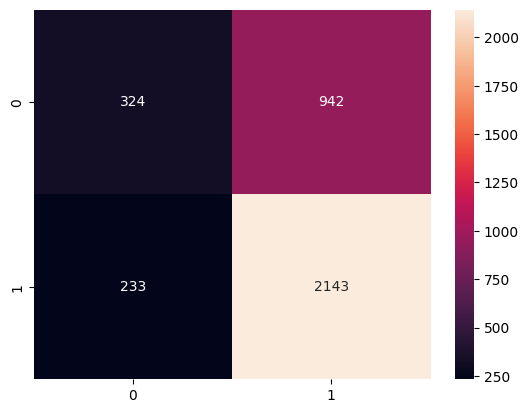

In [9]:
lr_cm = confusion_matrix(y_val , lr_pred)
sns.heatmap(lr_cm, annot=True,fmt='3g')
plt.show()

# Random Forest

In [10]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train)

RandomForestClassifier()

In [15]:
train_acc2 = rf.score(x_train , y_train)

rf_pred = rf.predict(x_val)

val_acc2 = accuracy_score(y_val , rf_pred) 

val_precision2 = precision_score(y_val , rf_pred , average='weighted')
val_recall2 = recall_score(y_val , rf_pred , average='weighted')
val_f1score2 = f1_score(y_val , rf_pred , average='weighted')

print(f"The training accuracy for Random Forest : {(train_acc2*100):0.2f}%\n")
print(f"The validation accuracy for Random Forest : {(val_acc2*100):0.2f}%\n")
print(f"The precision for Random Forest : {val_precision2:0.2f}\n")
print(f"The recall for Random Forest : {val_recall2:0.2f}\n")
print(f"The f1 score for Random Forest : {val_f1score2:0.2f}\n")

The training accuracy for Random Forest : 100.00%

The validation accuracy for Random Forest : 66.75%

The precision for Random Forest : 0.66

The recall for Random Forest : 0.67

The f1 score for Random Forest : 0.58



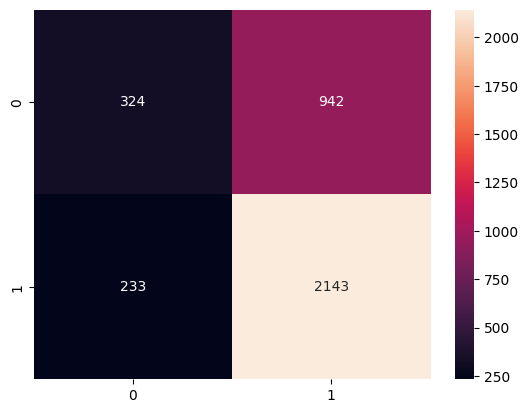

In [16]:
rf_cm = confusion_matrix(y_val , rf_pred)
sns.heatmap(lr_cm, annot=True,fmt='3g')
plt.show()

# Compare Models

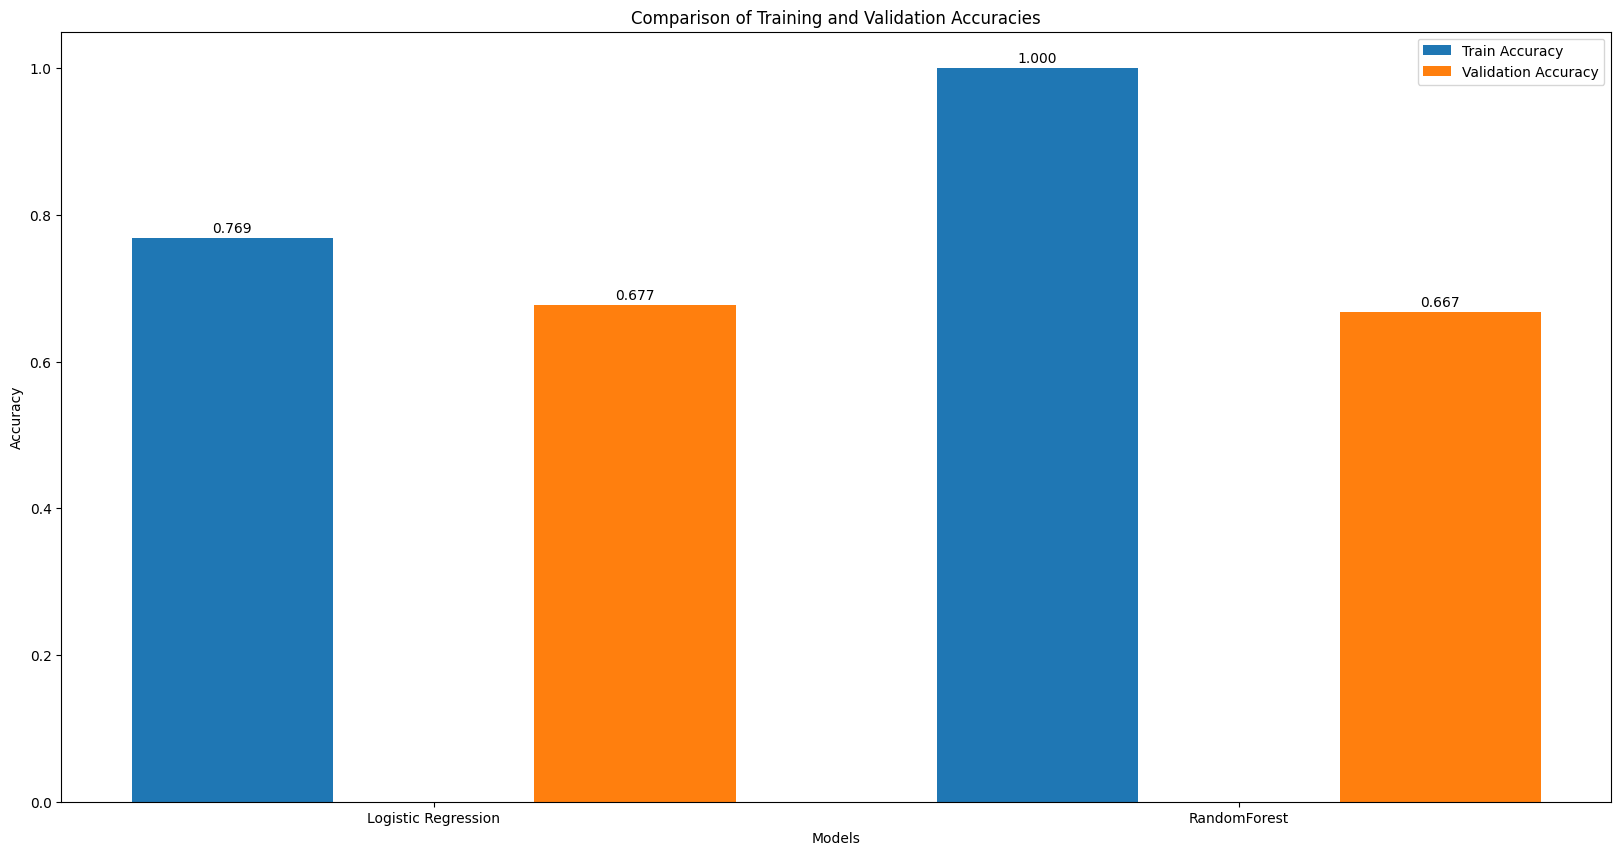

In [18]:
train_scores=[train_acc1,train_acc2]
val_scores=[val_acc1,val_acc2]

models = ['Logistic Regression','RandomForest']

x = np.arange(len(models))

width = 0.25

fig, ax = plt.subplots(figsize=(20, 10))

rects1 = ax.bar(x - width, train_scores, width, label='Train Accuracy')

rects2 = ax.bar(x + width, val_scores, width, label='Validation Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Validation Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
